In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
# import morfeusz2 as mf
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf



# Obróbka danych

Dane zaimportowane po procesie lemantyzacji, usunięcia "stopwordsów" oraz znaków specjalnych(projekt wykonywany na kaggle nie ma paczki używanej przez nas -> Morfeusz2)

In [2]:
# morf = mf.Morfeusz()
# df = pd.read_csv('../input/preprocessed-data/preprocessed_data.csv')
df = pd.read_csv('../input/danenojek/dane_nojek.csv')
df.Tweet = df.Tweet.apply(lambda x: str(x))
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# df.columns=['tweet','label']
df.head()

,Tweet,Label
0,rozsiewać fejk wiedzieć babaf druga babaf sek...,1
1,koniec informacja sobota Rosja oficjalny liczb...,0
2,KOMUCH dać wladzę zakazywać niszczyć przedsię...,1
3,pewność kolejny lockdown dobić działalność gos...,0
4,pedagogika wstyd wina czas zacząć,1


In [3]:
stopwords = ['gdziekolwiek',
'a',
'aby',
'ach',
'acz',
'aczkolwiek',
'aj',
'albo',
'ale',
'alez',
'ależ',
'ani',
'az',
'aż',
'bardziej',
'bardzo',
'beda',
'bedzie',
'bez',
'deda',
'będą',
'bede',
'będę',
'będzie',
'bo',
'bowiem',
'by',
'byc',
'być',
'byl',
'byla',
'byli',
'bylo',
'byly',
'był',
'była',
'było',
'były',
'bynajmniej',
'cala',
'cali',
'caly',
'cała',
'cały',
'ci',
'cie',
'ciebie',
'cię',
'co',
'cokolwiek',
'cos',
'coś',
'czasami',
'czasem',
'czemu',
'czy',
'czyli',
'daleko',
'dla',
'dlaczego',
'dlatego',
'do',
'dobrze',
'dokad',
'dokąd',
'dosc',
'dość',
'duzo',
'dużo',
'dwa',
'dwaj',
'dwie',
'dwoje',
'dzis',
'dzisiaj',
'dziś',
'gdy',
'gdyby',
'gdyz',
'gdyż',
'gdzie',
'gdzies',
'gdzieś',
'go',
'i',
'ich',
'ile',
'im',
'inna',
'inne',
'inny',
'innych',
'iz',
'iż',
'ja',
'jak',
'jakas',
'jakaś',
'jakby',
'jaki',
'jakichs',
'jakichś',
'jakie',
'jakis',
'jakiś',
'jakiz',
'jakiż',
'jakkolwiek',
'jako',
'jakos',
'jakoś',
'ją',
'je',
'jeden',
'jedna',
'jednak',
'jednakze',
'jednakże',
'jedno',
'jego',
'jej',
'jemu',
'jesli',
'jest',
'jestem',
'jeszcze',
'jeśli',
'jezeli',
'jeżeli',
'juz',
'już',
'kazdy',
'każdy',
'kiedy',
'kilka',
'kims',
'kimś',
'kto',
'ktokolwiek',
'ktora',
'ktore',
'ktorego',
'ktorej',
'ktory',
'ktorych',
'ktorym',
'ktorzy',
'ktos',
'ktoś',
'która',
'które',
'którego',
'której',
'który',
'których',
'którym',
'którzy',
'ku',
'lat',
'lecz',
'lub',
'ma',
'mają',
'mało',
'mam',
'mi',
'miedzy',
'między',
'mimo',
'mna',
'mną',
'mnie',
'moga',
'mogą',
'moi',
'moim',
'moj',
'moja',
'moje',
'moze',
'mozliwe',
'mozna',
'może',
'możliwe',
'można',
'mój',
'mu',
'musi',
'my',
'na',
'nad',
'nam',
'nami',
'nas',
'nasi',
'nasz',
'nasza',
'nasze',
'naszego',
'naszych',
'natomiast',
'natychmiast',
'nawet',
'nia',
'nią',
'nic',
'nich',
'nie',
'niech',
'niego',
'niej',
'niemu',
'nigdy',
'nim',
'nimi',
'niz',
'niż',
'no',
'o',
'obok',
'od',
'około',
'on',
'ona',
'one',
'oni',
'ono',
'oraz',
'oto',
'owszem',
'pan',
'pana',
'pani',
'po',
'pod',
'podczas',
'pomimo',
'ponad',
'poniewaz',
'ponieważ',
'powinien',
'powinna',
'powinni',
'powinno',
'poza',
'prawie',
'przeciez',
'przecież',
'przed',
'przede',
'przedtem',
'przez',
'przy',
'roku',
'rowniez',
'również',
'sam',
'sama',
'są',
'sie',
'się',
'skad',
'skąd',
'soba',
'sobą',
'sobie',
'sposob',
'sposób',
'swoje',
'ta',
'tak',
'taka',
'taki',
'takie',
'takze',
'także',
'tam',
'te',
'tego',
'tej',
'ten',
'teraz',
'też',
'to',
'toba',
'tobą',
'tobie',
'totez',
'toteż',
'totobą',
'trzeba',
'tu',
'tutaj',
'twoi',
'twoim',
'twoj',
'twoja',
'twoje',
'twój',
'twym',
'ty',
'tych',
'tylko',
'tym',
'u',
'w',
'wam',
'wami',
'was',
'wasz',
'wasza',
'wasze',
'we',
'według',
'wiele',
'wielu',
'więc',
'więcej',
'wlasnie',
'właśnie',
'wszyscy',
'wszystkich',
'wszystkie',
'wszystkim',
'wszystko',
'wtedy',
'wy',
'z',
'za',
'zaden',
'zadna',
'zadne',
'zadnych',
'zapewne',
'zawsze',
'ze',
'zeby',
'zeznowu',
'zł',
'znow',
'znowu',
'znów',
'zostal',
'został',
'żaden',
'żadna',
'żadne',
'żadnych',
'że',
'żeby'
]

Z powodu dysproporcji w danych (wybraliśmy tweety w języku polskim) zmuszeni jesteśmy ograniczyć nasz zbiór testowy

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Label', ylabel='count'>

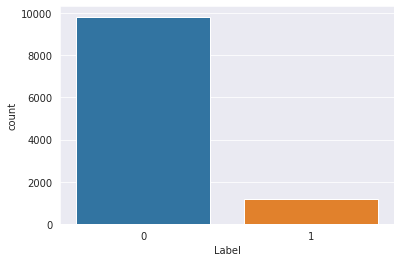

In [4]:
sns.set_style("darkgrid")
sns.countplot(df.Label)

In [5]:
df2 = df.loc[df["Label"]==1,:]
df3 = df.loc[df["Label"]==0,:].sample(frac=1, random_state =4252)

In [6]:
df = df2.append(df3.iloc[:2200,:])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Label', ylabel='count'>

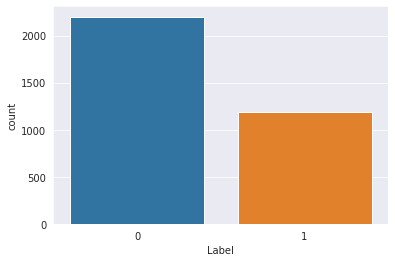

In [7]:
sns.set_style("darkgrid")
sns.countplot(df.Label)

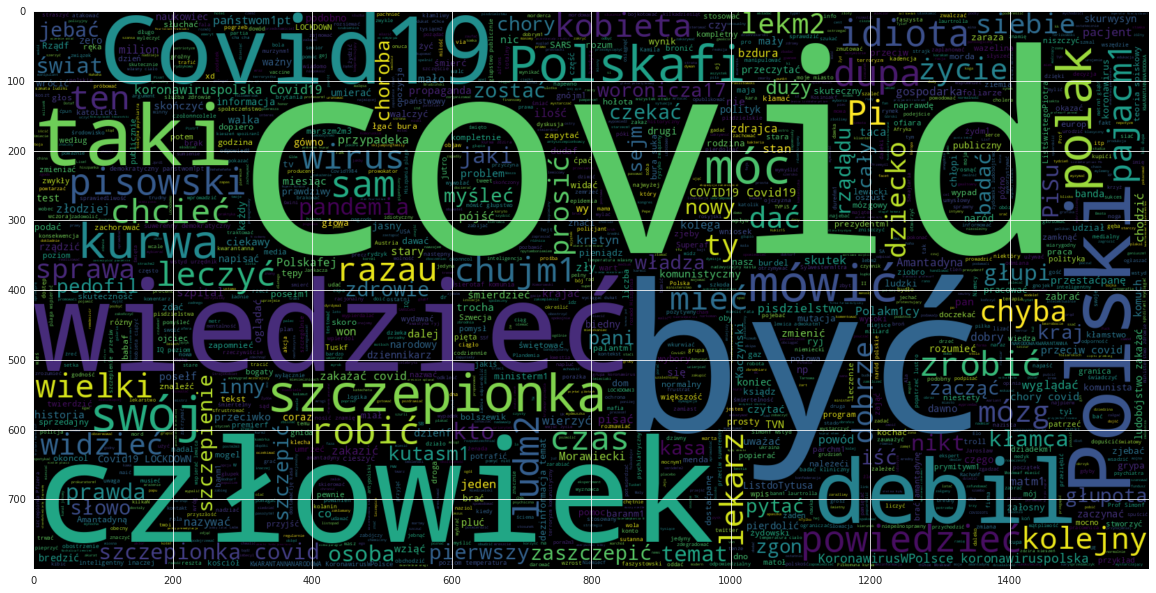

In [8]:
plt.figure(figsize = (20,20)) # Tekst z mową nienawiści
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.Label == 1].Tweet))
plt.imshow(wc , interpolation = 'bilinear')
# plt.imsave('./Hate.png', wc)

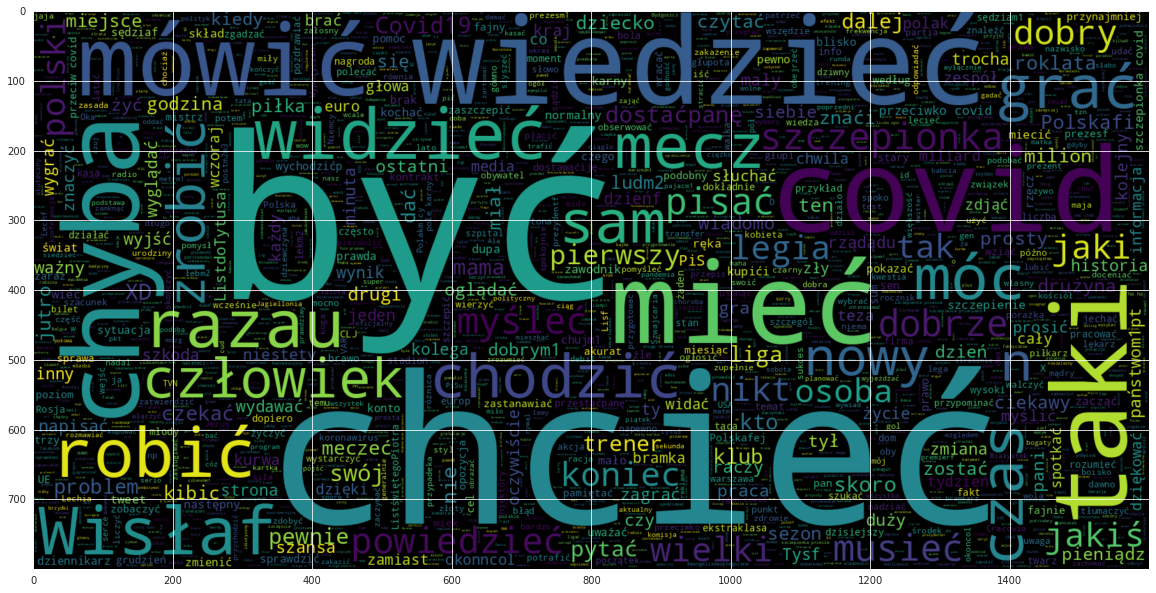

In [9]:
plt.figure(figsize = (20,20)) # Tekst bez mowy nienawiści
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.Label == 0].Tweet))
plt.imshow(wc , interpolation = 'bilinear')
# plt.imsave('./Normal.png', wc)

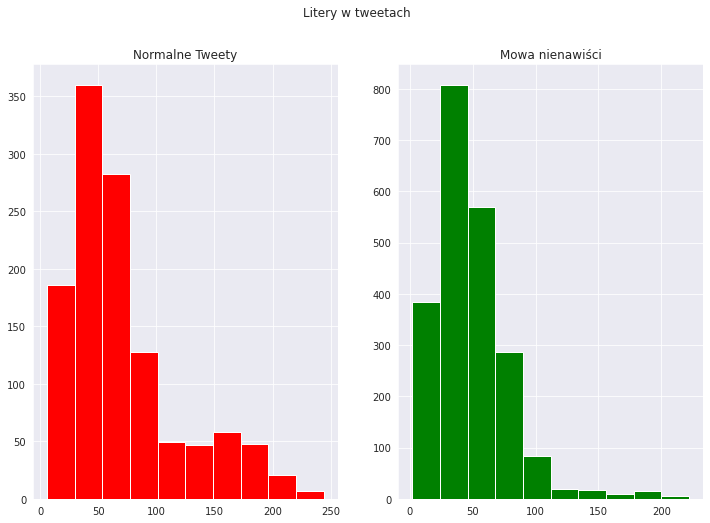

In [10]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['Label']==1]['Tweet'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Normalne Tweety')
text_len=df[df['Label']==0]['Tweet'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Mowa nienawiści')
fig.suptitle('Litery w tweetach')
plt.show()


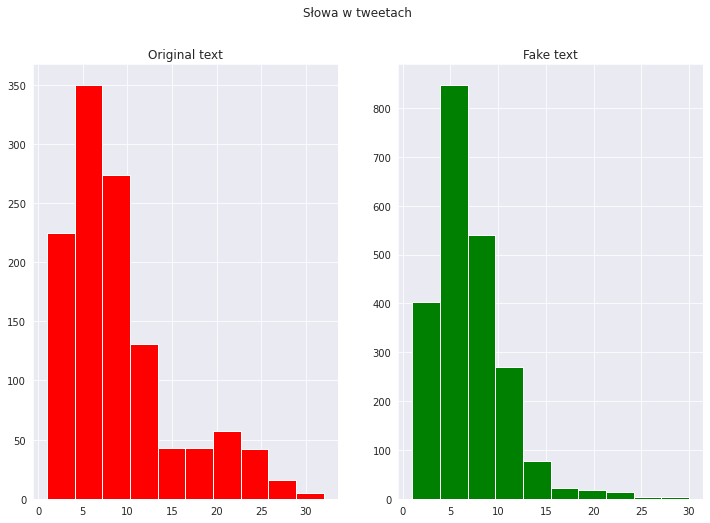

In [11]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['Label']==1]['Tweet'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['Label']==0]['Tweet'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Słowa w tweetach')
plt.show()


In [12]:
# Zbiór słów i znaków interpunkcyjnych do usunięcia z tweetów
stop = set(stopwords)
punctuation = list(string.punctuation)
stop.update(punctuation)

In [13]:
# Funkcja nie działa na kaggle
#sprowadza każdy wyraz w tweecie do bezokolicznika
# def Lemmatize(text):
#     word_list = text.split()
#     new_word_list = []

#     for w in word_list:    
#         new_word_list.append(morf.analyse(w)[0][2][1])

#     return ' '.join(new_word_list)
# ```Funkcja pozbywająca się emotikon, artefaktów z tekstu```
def RemoveTweetArtiffacts(text):    
     s = text
     type_list = [':Sm3', ':S', ':P', ':C', ':V', ':A', ':I', ':M', ':T', ':D', ':m1']

     for word in type_list:
          s = s.replace(word, '')

     s = s.translate(str.maketrans('', '', string.punctuation))

     return s

In [14]:
#Szereg funkcji przygotowujący dane do modelu
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Usuwanie nawiasów
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Usuwanie url
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Usuwanie stopwords
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip().replace('.',' ').replace(',',' '))
    return " ".join(final_text)
#Usuwanie zbędnych wyrazów
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text


df['Tweet']=df['Tweet'].apply(lambda x: denoise_text(x))
df['Tweet']=df['Tweet'].apply(lambda x: RemoveTweetArtiffacts(x))
# df.tweet = df.tweet.apply(lambda x: Lemmatize(x)) # lemmatization


In [15]:
df.head()

,Tweet,Label
0,rozsiewać fejk wiedzieć babaf druga babaf sekr...,1
2,KOMUCH dać wladzę zakazywać niszczyć przedsięb...,1
4,pedagogika wstyd wina czas zacząć,1
5,martwy lekm2 covid 19 Europa wymierać Ameryka ...,1
6,oporny śmiertelność covid 0 1 przestaćpanę rob...,1


In [16]:
# Funkcja tworząca listę wszystkich słów w tweetach
def get_corpus(text):
    words = []
    for i in text:
        i = str(i)
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.Tweet)
len(corpus)

24320

In [17]:
# Licznik częstości wyrazów w tweetach
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'covid': 339,
 'wiedzieć': 118,
 'szczepionka': 95,
 'chcieć': 95,
 'człowiek': 84,
 'mieć': 84,
 'mówić': 81,
 'Covid19': 76,
 '😂': 74,
 'chyba': 73}

## Rozdzielenie danych na testowe i treningowe

In [18]:
x_train,x_test,y_train,y_test = train_test_split(df.Tweet,df.Label,random_state = 0)

## Tokenizacja

In [19]:
max_features = 7000
maxlen = 300

In [20]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)


tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

## Wstęp do metody GloVe

In [21]:
# korzystamy z wcześniej przetrenowanego modelu i wag dostępnych na kaggle
# https://www.kaggle.com/icw123/glove-twitter
EMBEDDING_FILE = '../input/glove-twitter/glove.twitter.27B.100d.txt'



In [22]:


def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))



In [23]:
#wypełnienie wagami macierzy używanej w modelu

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector



/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [24]:

# Hiperparametry modelu
batch_size = 256
epochs = 7
embed_size = 100



In [25]:
#Defining Neural Network
model = Sequential()
#Warstwa już z załadowanymi wagami
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          700000    
_________________________________________________________________
lstm (LSTM)                  (None, 300, 128)          117248    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 868,769
Trainable params: 168,769
Non-trainable params: 700,000
_________________________________________________________________


In [26]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [27]:

history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

2022-01-16 10:20:07.400985: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/7
10/10 [==============================] - 54s 4s/step - loss: 0.6578 - accuracy: 0.6432 - val_loss: 0.6196 - val_accuracy: 0.6706
Epoch 2/7
10/10 [==============================] - 41s 4s/step - loss: 0.6028 - accuracy: 0.6971 - val_loss: 0.5989 - val_accuracy: 0.6860
Epoch 3/7
10/10 [==============================] - 41s 4s/step - loss: 0.5933 - accuracy: 0.6904 - val_loss: 0.5825 - val_accuracy: 0.6895
Epoch 4/7
10/10 [==============================] - 41s 4s/step - loss: 0.5642 - accuracy: 0.7168 - val_loss: 0.5614 - val_accuracy: 0.7178
Epoch 5/7
10/10 [==============================] - 40s 4s/step - loss: 0.5186 - accuracy: 0.7349 - val_loss: 0.5936 - val_accuracy: 0.7119
Epoch 6/7
10/10 [==============================] - 41s 4s/step - loss: 0.4846 - accuracy: 0.7672 - val_loss: 0.5712 - val_accuracy: 0.7285
Epoch 7/7
10/10 [==============================] - 41s 4s/step - loss: 0.4463 - accuracy: 0.7885 - val_loss: 0.5816 - val_accuracy: 0.7296


In [28]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

80/80 [==============================] - 33s 414ms/step - loss: 0.3740 - accuracy: 0.8377
Accuracy of the model on Training Data is -  83.77313613891602 %
27/27 [==============================] - 11s 423ms/step - loss: 0.5816 - accuracy: 0.7296
Accuracy of the model on Testing Data is -  72.96339869499207 %


In [29]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

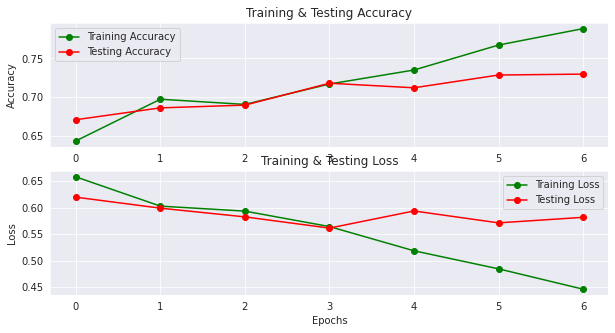

In [30]:
epochs = [i for i in range(7)]
fig , ax = plt.subplots(2,1)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(10,5)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
# ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [31]:
cm = confusion_matrix(y_test,y_pred)

cm

array([[429, 115],
       [114, 189]])

In [32]:
cm = pd.DataFrame(cm , index = ['Mowa neutralna','Mowa nienawiści'] , columns = ['Mowa neutrlna','Mowa nienawiści'])

Text(69.0, 0.5, 'Actual')

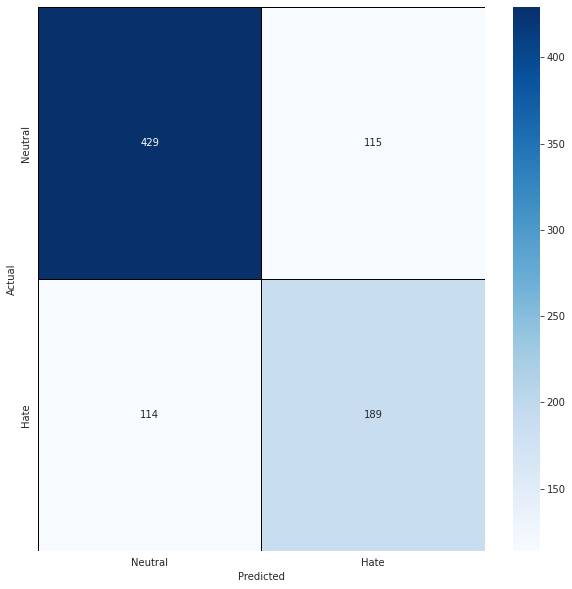

In [33]:

plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Neutral','Hate'] , yticklabels = ['Neutral','Hate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")


In [34]:
cm = pd.DataFrame(cm , index = ['Mowa neutralna','Mowa nienawiści'] , columns = ['Mowa neutralna','Mowa nienawiści'])
cm

,Mowa neutralna,Mowa nienawiści
Mowa neutralna,NaN,115
Mowa nienawiści,NaN,189


In [35]:
from sklearn.metrics import recall_score

In [36]:
recall_score(y_test,y_pred)

0.6237623762376238

In [37]:
f1_score(y_test,y_pred)

0.6227347611202636